In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
## Loading train dataset
df = pd.read_csv(r"D:\Capstone_Project\Dataset\train.csv")


In [3]:
df.head(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [54]:
df.duplicated().sum()

np.int64(0)

In [4]:
## understanding dataset for Train:
def understand(df):
    print("==="*10)
    print("Understanding Dataset")
    r1 = df.head(2)
    print(r1)
    print("==="*10)
    print("Information")
    r2 = df.info()
    print(r2)
    print("==="*10)
    print("Describing Dataset")
    r3 = df.describe()
    print(r3)
    print("==="*10)
    print("Missing Values")
    r4 = df.isnull().sum()
    print(r4)
    print("==="*10)
    print("Duplicate Values")
    r5 = df.duplicated()
    print(r5)
    print("==="*10)

understand(df)

Understanding Dataset
        ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                   37                     4.9   
1  0xb379     BANGRES18DEL02                   34                     4.5   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   

   Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
0                    75.912471  19-03-2022    11:30:00          11:45:00   
1                    77.813237  25-03-2022    19:45:00          19:50:00   

   Weatherconditions Road_traffic_density  Vehicle_condition Type_of_order  \
0   conditions Sunny                High                   2        Snack    
1  conditions Stormy                 Jam                   2        Snack    

  Type_of_vehicle multiple_deliveries Festival       

In [5]:
## treating the time_taken column

df["time_taken"] = df["Time_taken(min)"].str.replace("(min)","",regex=False)
df["time_taken"]=df["time_taken"].str.strip()
df["time_taken"]=df["time_taken"].astype(int)
df=df.drop("Time_taken(min)",axis=1)
df.head(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,time_taken
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30


In [6]:
## Treating all the time columns (Order_Date, Time_Order_picked, Time_Ordered)

# converting Order_Date
df["Order_Date"] = pd.to_datetime(df["Order_Date"], format="%d-%m-%Y", errors="coerce")

# converting Time_Order_picked
df["Time_Order_picked"] = pd.to_datetime(df["Time_Order_picked"], format="%H:%M:%S", errors="coerce")

# converting Time_Ordered
df["Time_Orderd"] = pd.to_datetime(df["Time_Orderd"], format="%H:%M:%S", errors="coerce")

df["Delivery_person_Age"]=df["Delivery_person_Age"].astype(str).str.strip().replace("NaN", pd.NA) ## to remove the NaN values

df["Delivery_person_Age"]=pd.to_numeric(df["Delivery_person_Age"], errors="coerce").astype("Int64")  ## converting df to int64

In [7]:
df["Delivery_person_Ratings"]=df["Delivery_person_Ratings"].astype(str).str.strip().replace("NaN", pd.NA) ## to remove the NaN values

df["Delivery_person_Ratings"]=pd.to_numeric(df["Delivery_person_Ratings"], errors="coerce").astype("Float64")  ## converting df to int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45593 non-null  object        
 1   Delivery_person_ID           45593 non-null  object        
 2   Delivery_person_Age          43739 non-null  Int64         
 3   Delivery_person_Ratings      43685 non-null  Float64       
 4   Restaurant_latitude          45593 non-null  float64       
 5   Restaurant_longitude         45593 non-null  float64       
 6   Delivery_location_latitude   45593 non-null  float64       
 7   Delivery_location_longitude  45593 non-null  float64       
 8   Order_Date                   45593 non-null  datetime64[ns]
 9   Time_Orderd                  43862 non-null  datetime64[ns]
 10  Time_Order_picked            45593 non-null  datetime64[ns]
 11  Weatherconditions            45593 non-nu

In [9]:
df.head(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,time_taken
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,1900-01-01 11:30:00,1900-01-01 11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,1900-01-01 19:45:00,1900-01-01 19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,1900-01-01 08:30:00,1900-01-01 08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,1900-01-01 18:00:00,1900-01-01 18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,1900-01-01 13:30:00,1900-01-01 13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30


In [10]:
## detecting missing values
df.isnull().mean()*100

ID                             0.000000
Delivery_person_ID             0.000000
Delivery_person_Age            4.066414
Delivery_person_Ratings        4.184853
Restaurant_latitude            0.000000
Restaurant_longitude           0.000000
Delivery_location_latitude     0.000000
Delivery_location_longitude    0.000000
Order_Date                     0.000000
Time_Orderd                    3.796635
Time_Order_picked              0.000000
Weatherconditions              0.000000
Road_traffic_density           0.000000
Vehicle_condition              0.000000
Type_of_order                  0.000000
Type_of_vehicle                0.000000
multiple_deliveries            0.000000
Festival                       0.000000
City                           0.000000
time_taken                     0.000000
dtype: float64

In [11]:
## Handling missing values

df["Delivery_person_Age"].fillna(df["Delivery_person_Age"].median(), inplace=True)

df["Delivery_person_Ratings"].fillna(df["Delivery_person_Ratings"].mean(), inplace=True)

df["Time_Orderd"].fillna(df["Time_Orderd"].mean(), inplace=True)



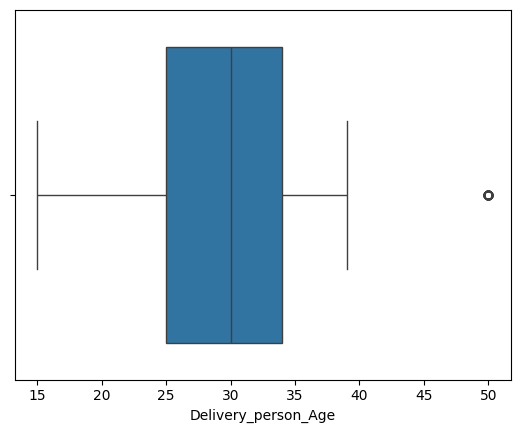

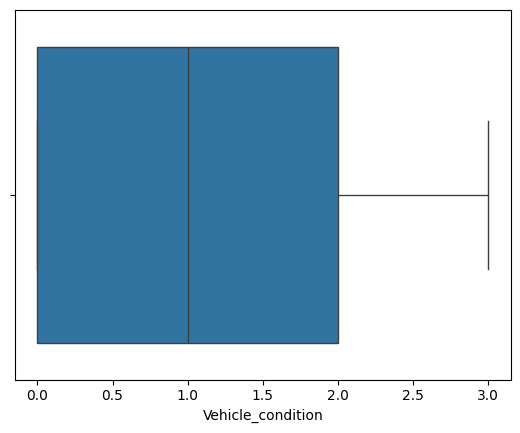

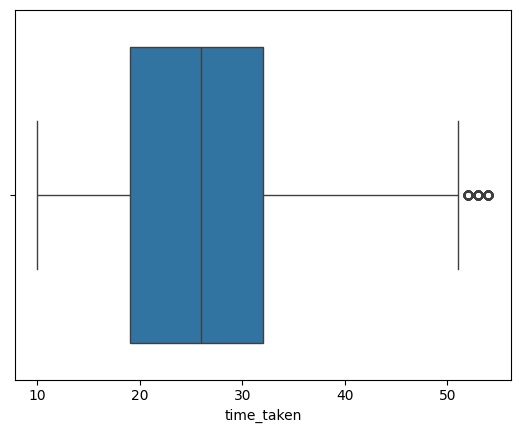

In [12]:
## detecting outliers for int:
df_int = df.select_dtypes(include="int64")
for col in df_int:
    plt.Figure(figsize=(10,4))
    sns.boxplot(x=df_int[col])
    plt.show()

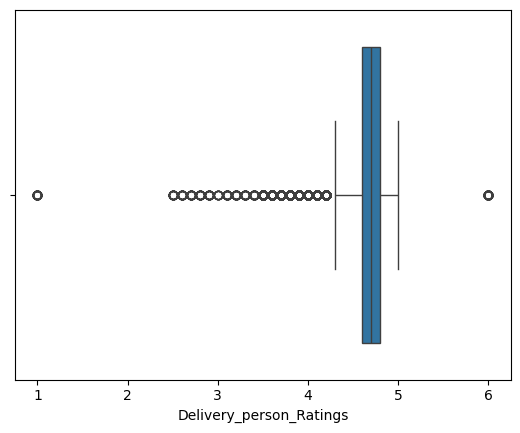

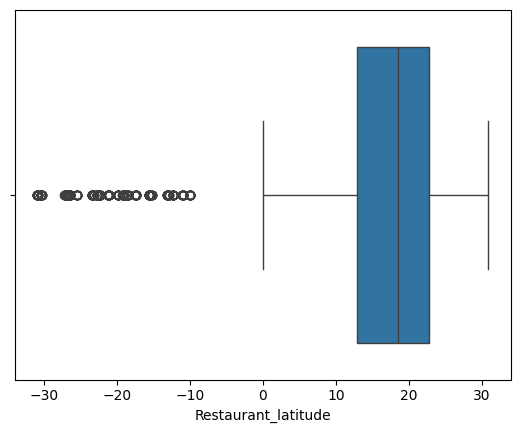

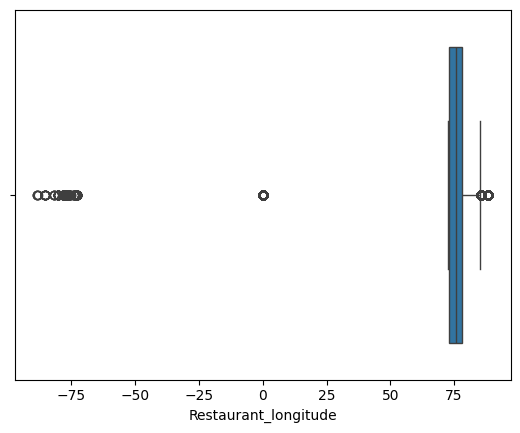

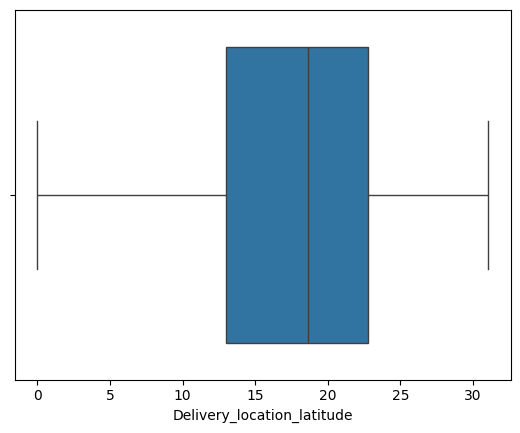

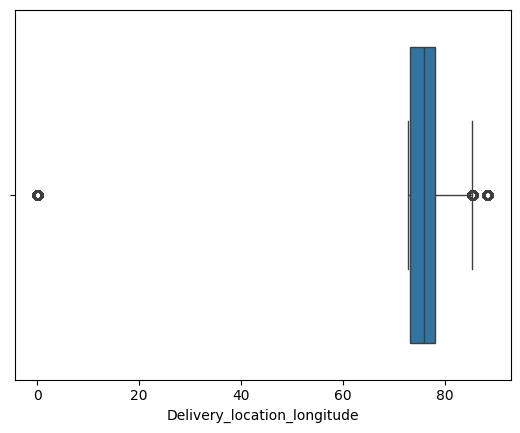

In [13]:
## detecting outliers for float:
df_float = df.select_dtypes(include="float64")
for col in df_float:
    plt.Figure(figsize=(10,4))
    sns.boxplot(x=df_float[col])
    plt.show()

<Axes: ylabel='Count'>

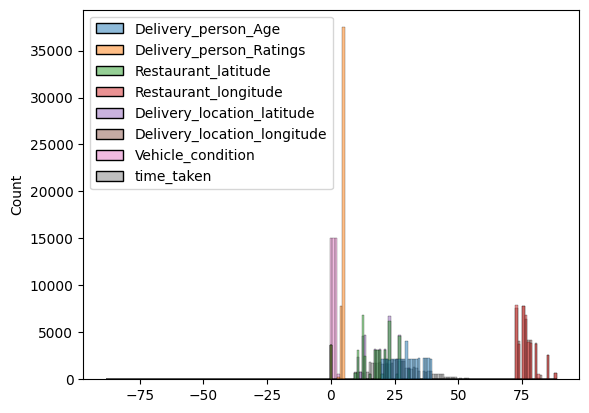

In [14]:
sns.histplot(data=df)

In [15]:
## Handling Outliers- Train
df_outliers = df[["Delivery_person_Ratings","Delivery_location_latitude","Delivery_location_longitude"]].copy()

for col in df_outliers.columns:
    q1 = df_outliers[col].quantile(0.25)
    q3 = df_outliers[col].quantile(0.75)
    iqr = q3 - q1
    
    # Correct lower & upper limits
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    
    # Cap the outliers
    df_outliers[col] = np.where(
        df_outliers[col] < lower_limit, lower_limit,
        np.where(df_outliers[col] > upper_limit, upper_limit, df_outliers[col])
    )

In [16]:
df_cleaned= pd.DataFrame(df_outliers) # converting to dataframe

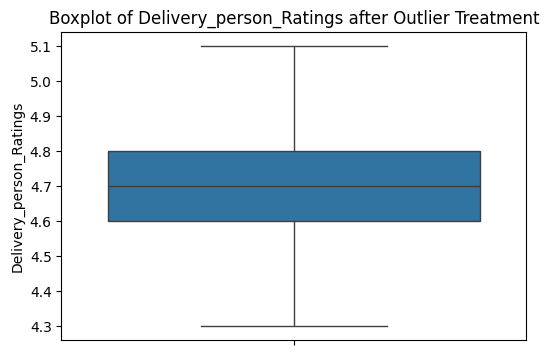

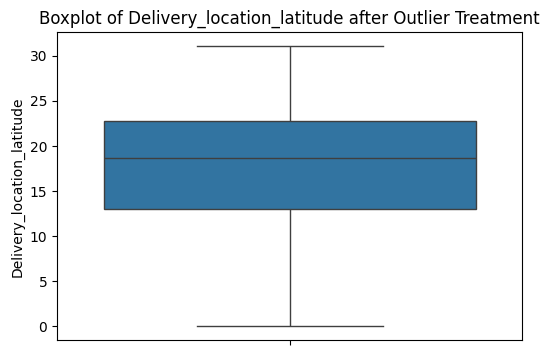

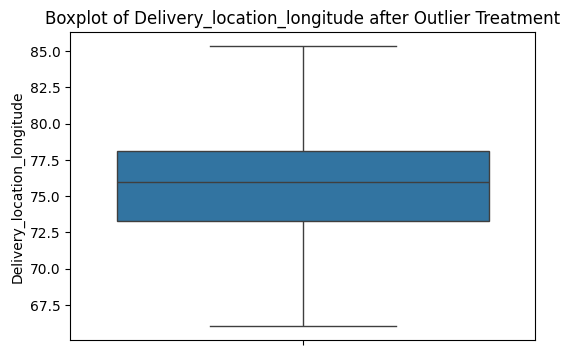

In [17]:
## checking the cleaned columns-train
for col in df_cleaned.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df_cleaned[col])
    plt.title(f"Boxplot of {col} after Outlier Treatment")
    plt.show()

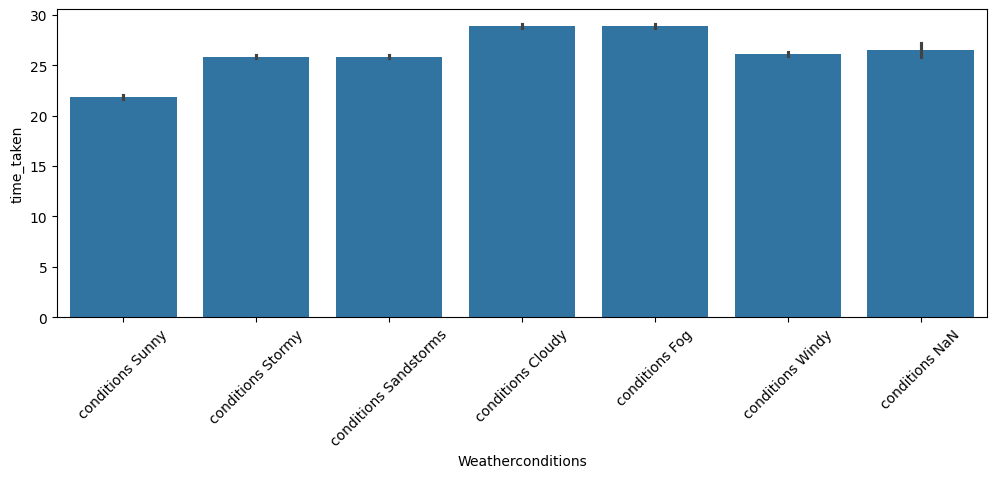

In [18]:
## Exploratory Data Analysis (EDA):

# Weatherconditions vs time_taken
plt.figure(figsize=(12,4))
sns.barplot(x="Weatherconditions", y="time_taken", data=df)
plt.xticks(rotation=45)
plt.show()


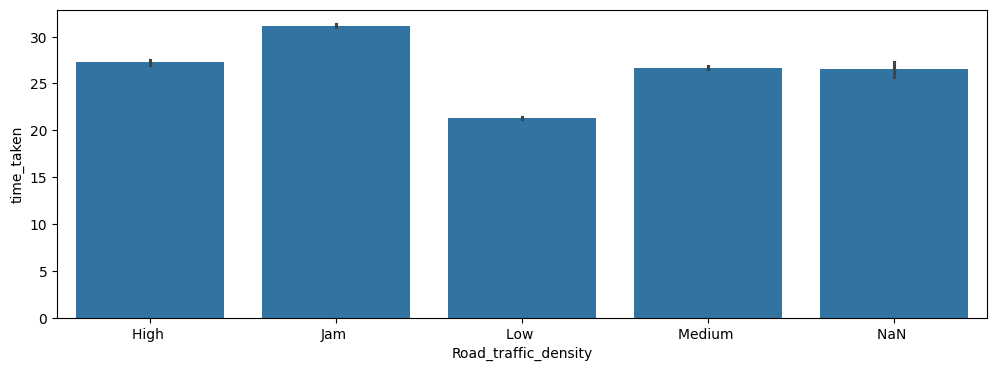

In [19]:
# Road_traffic_density vs time_taken

plt.figure(figsize=(12,4))
sns.barplot(x="Road_traffic_density", y="time_taken", data=df)
plt.show()

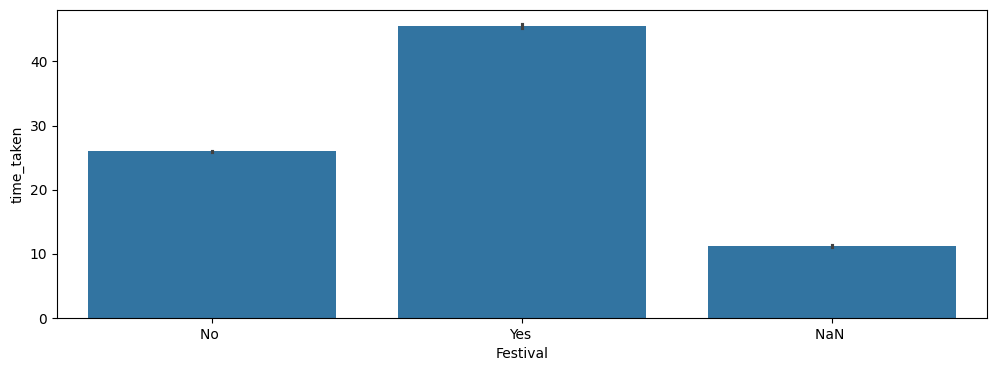

In [20]:
# Festival vs time_taken

plt.figure(figsize=(12,4))
sns.barplot(x="Festival", y="time_taken", data=df)
plt.show()

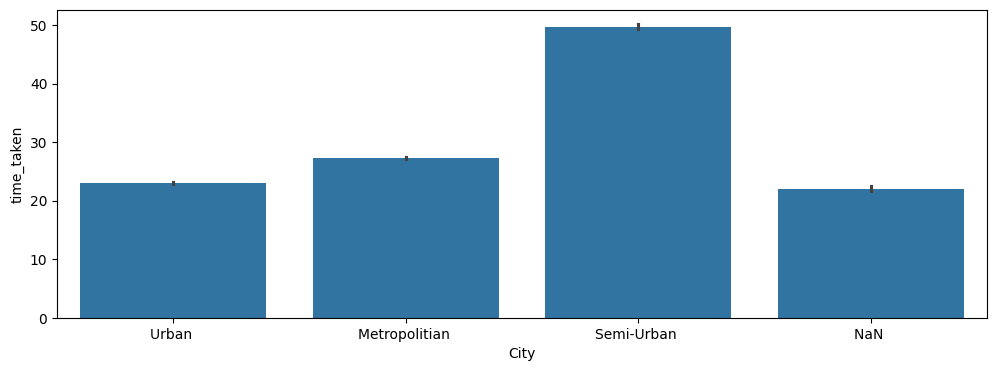

In [21]:
# City vs time_taken

plt.figure(figsize=(12,4))
sns.barplot(x="City", y="time_taken", data=df)
plt.show()

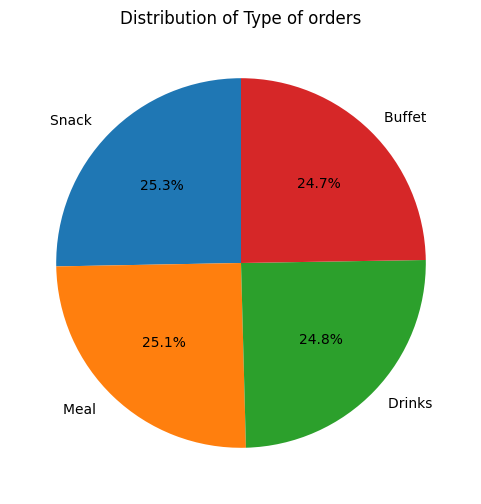

In [57]:
plt.figure(figsize=(6,6))

# Count values of Type_of_vehicle
order_counts = df["Type_of_order"].value_counts()

# Plot pie chart
plt.pie(
    order_counts, 
    labels=order_counts.index, 
    autopct='%1.1f%%', 
    startangle=90
)

plt.title("Distribution of Type of orders")
plt.show()

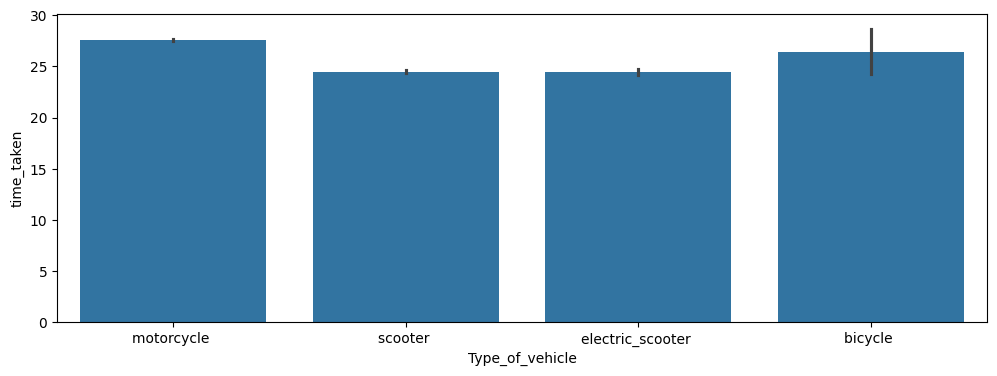

In [ ]:
# Type_of_vehicle vs time_taken

plt.figure(figsize=(12,4))
sns.barplot(x="Type_of_vehicle", y="time_taken", data=df)
plt.show()

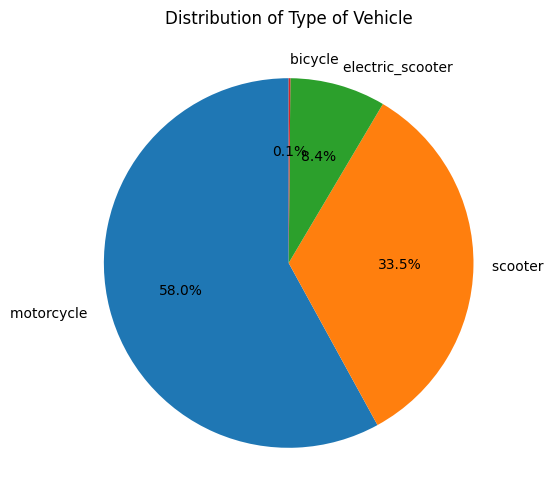

In [23]:
## Vehicle Distribution

plt.figure(figsize=(6,6))

# Count values of Type_of_vehicle
vehicle_counts = df["Type_of_vehicle"].value_counts()

# Plot pie chart
plt.pie(
    vehicle_counts, 
    labels=vehicle_counts.index, 
    autopct='%1.1f%%', 
    startangle=90
)

plt.title("Distribution of Type of Vehicle")
plt.show()


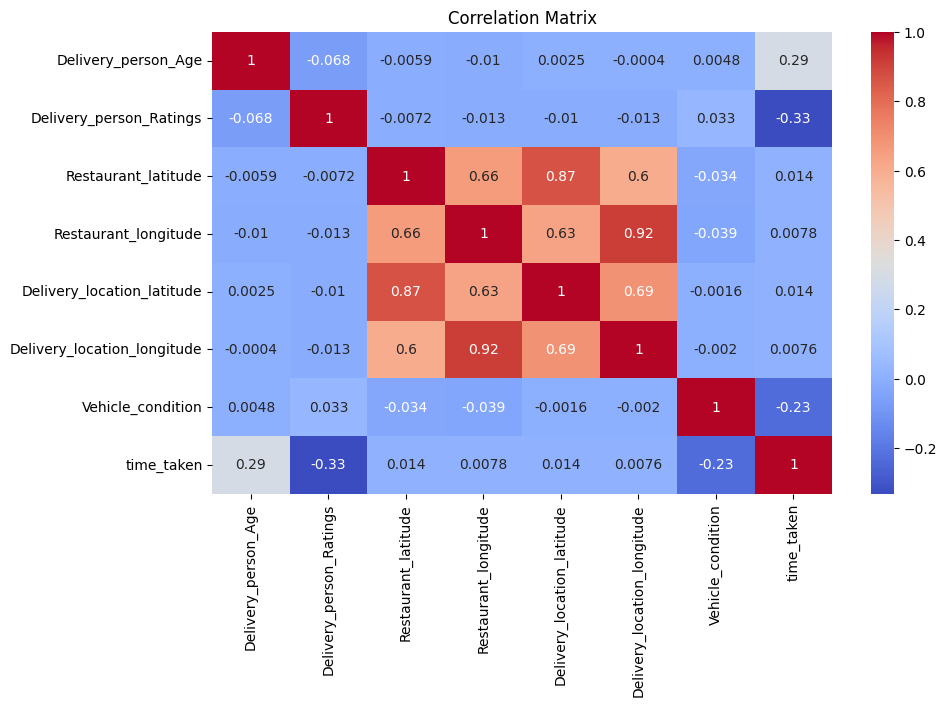

In [24]:
## Correlation Matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=["number"]).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [25]:
## splitting the dataset into x_train and y_train
from sklearn.model_selection import train_test_split
X= df.drop(columns=["time_taken"])
Y = df["time_taken"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [60]:
## linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(x_train.select_dtypes(include=["number"]), y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [61]:
y_pred = lr.predict(x_test.select_dtypes(include=["number"]))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2_Score: {r2}")

MAE: 6.563700023238368
MSE: 67.3303557614811
RMSE: 8.205507648005765
R2_Score: 0.2320736015439775


In [28]:
## random forest regressor model
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(x_train.select_dtypes(include=["number"]), y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [31]:
y_pred_rfr = rfr.predict(x_test.select_dtypes(include=["number"]))
mae_rfr = mean_absolute_error(y_test, y_pred)
mse_rfr = mean_squared_error(y_test, y_pred)
rmse_rfr = np.sqrt(mse)
r2_rfr = r2_score(y_test, y_pred_rfr)
print(f"MAE: {mae_rfr}")
print(f"MSE: {mse_rfr}")
print(f"RMSE: {rmse_rfr}")
print(f"R2_Score: {r2_rfr}")

MAE: 6.563700023238368
MSE: 67.3303557614811
RMSE: 8.205507648005765
R2_Score: 0.35817718962631684


In [32]:
## xgboost regressor model
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(x_train.select_dtypes(include=["number"]), y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
y_pred_xgb = xgb.predict(x_test.select_dtypes(include=["number"]))
mae_xgb = mean_absolute_error(y_test, y_pred)
mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse)
r2_xgb = r2_score(y_test, y_pred_xgb)
acc
print(f"MAE: {mae_xgb}")
print(f"MSE: {mse_xgb}")
print(f"RMSE: {rmse_xgb}")
print(f"R2_Score: {r2_xgb}")

MAE: 6.563700023238368
MSE: 67.3303557614811
RMSE: 8.205507648005765
R2_Score: 0.43445461988449097


In [36]:
# Load test dataset
test_df = pd.read_csv(r"D:\Capstone_Project\Dataset\train.csv")


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Load test dataset
test_df = pd.read_csv(r"D:\Capstone_Project\Dataset\train.csv")

# Drop the same columns as in train preprocessing
cols_to_drop = ["Delivery_person_Ratings", "Restaurant_latitude", "Restaurant_longitude"]
test_df = test_df.drop(cols_to_drop, axis=1)

# Define numerical and categorical features
num_features = ["Delivery_person_Age", "Delivery_location_latitude", "Delivery_location_longitude"]
cat_features = ["Weatherconditions", "Road_traffic_density", "Type_of_order", "Type_of_vehicle", "Festival", "City"]

# Numeric pipeline
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical pipeline
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine into a preprocessor
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

# Fit preprocessing on train dataset
X_train_transformed = preprocessor.fit_transform(x_train)

# Train a regressor on transformed train data
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

# Transform test dataset
X_test_transformed = preprocessor.transform(test_df)

# Predict
y_pred_test_rfr = regressor.predict(X_test_transformed)

# Save submission
submission = pd.DataFrame({
    "ID": test_df["ID"],
    "Predicted_time_taken(min)": y_pred_test_rfr
})
print(submission)



            ID  Predicted_time_taken(min)
0      0x4607                   21.970657
1      0xb379                   33.563946
2      0x5d6d                   17.269770
3      0x7a6a                   23.916319
4      0x70a2                   31.314754
...        ...                        ...
45588  0x7c09                   34.172020
45589  0xd641                   29.417984
45590  0x4f8d                   19.621740
45591  0x5eee                   27.005629
45592  0x5fb2                   32.399357

[45593 rows x 2 columns]


In [49]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Load test dataset
test_df = pd.read_csv(r"D:\Capstone_Project\Dataset\train.csv")

# Drop the same columns as in train preprocessing
cols_to_drop = ["Delivery_person_Ratings", "Restaurant_latitude", "Restaurant_longitude"]
test_df = test_df.drop(cols_to_drop, axis=1)

# Define numerical and categorical features
num_features = ["Delivery_person_Age", "Delivery_location_latitude", "Delivery_location_longitude"]
cat_features = ["Weatherconditions", "Road_traffic_density", "Type_of_order", "Type_of_vehicle", "Festival", "City"]

# Numeric pipeline
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical pipeline
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine into a preprocessor
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
     ("cat", cat_pipeline, cat_features)
])

# Fit preprocessing on train dataset
X_train_transformed = preprocessor.fit_transform(x_train)

# Train a regressor on transformed train data
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

# Transform test dataset
X_test_transformed = preprocessor.transform(test_df)

# Predict
y_pred_test_lr = regressor.predict(X_test_transformed)

# Save submission
submission = pd.DataFrame({
    "ID": test_df["ID"],
    "Predicted_time_taken(min)": y_pred_test_lr
})
print(submission)

            ID  Predicted_time_taken(min)
0      0x4607                   25.288602
1      0xb379                   31.034373
2      0x5d6d                   17.255120
3      0x7a6a                   27.874378
4      0x70a2                   29.331190
...        ...                        ...
45588  0x7c09                   29.046857
45589  0xd641                   28.112406
45590  0x4f8d                   22.823031
45591  0x5eee                   26.797438
45592  0x5fb2                   25.216892

[45593 rows x 2 columns]


In [50]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Load test dataset
test_df = pd.read_csv(r"D:\Capstone_Project\Dataset\train.csv")

# Drop the same columns as in train preprocessing
cols_to_drop = ["Delivery_person_Ratings", "Restaurant_latitude", "Restaurant_longitude"]
test_df = test_df.drop(cols_to_drop, axis=1)

# Define numerical and categorical features
num_features = ["Delivery_person_Age", "Delivery_location_latitude", "Delivery_location_longitude"]
cat_features = ["Weatherconditions", "Road_traffic_density", "Type_of_order", "Type_of_vehicle", "Festival", "City"]

# Numeric pipeline
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical pipeline
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine into a preprocessor
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features), 
    ("cat", cat_pipeline, cat_features)
])

# Fit preprocessing on train dataset
X_train_transformed = preprocessor.fit_transform(x_train)

# Train a regressor on transformed train data
regressor = XGBRegressor()
regressor.fit(X_train_transformed, y_train)

# Transform test dataset
X_test_transformed = preprocessor.transform(test_df)

# Predict
y_pred_test_xgb = regressor.predict(X_test_transformed)

# Save submission
submission = pd.DataFrame({
    "ID": test_df["ID"],
    "Predicted_time_taken(min)": y_pred_test_xgb
})
print(submission)

            ID  Predicted_time_taken(min)
0      0x4607                   21.970657
1      0xb379                   33.563946
2      0x5d6d                   17.269770
3      0x7a6a                   23.916319
4      0x70a2                   31.314754
...        ...                        ...
45588  0x7c09                   34.172020
45589  0xd641                   29.417984
45590  0x4f8d                   19.621740
45591  0x5eee                   27.005629
45592  0x5fb2                   32.399357

[45593 rows x 2 columns]
